<a href="https://colab.research.google.com/github/prakash0909/eip4-assignments/blob/master/Prakash_Shanmugam_Assignment1A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential, Model
from keras.layers import Activation, Flatten, Add, Input
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.utils import np_utils
from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


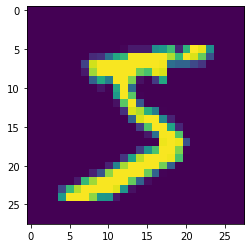

In [38]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [41]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [43]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
# Trying to optimize the network by using BatchNormalization and Label Smoothing techniques under 18,000 parameters


model = Sequential()

input = Input(shape=(28, 28, 1,))

# Layer 1
layer_1 = Conv2D(28, (3,3), strides=(1,1), padding='valid', name='conv_1', use_bias=False)(input)
layer_1 = BatchNormalization(name='norm_1')(layer_1)
layer_1 = keras.layers.ReLU(max_value=None, negative_slope=0.0, threshold=0.0)(layer_1)
# Layer 2
layer_2 = Conv2D(32, (3,3), strides=(1,1), padding='valid', name='conv_2', use_bias=False)(layer_1)
layer_2 = BatchNormalization(name='norm_2')(layer_2)
layer_2 = keras.layers.ReLU(max_value=None, negative_slope=0.0, threshold=0.0)(layer_2)
# Layer 3
layer_3 = Conv2D(16, (3,3), strides=(1,1), padding='valid', name='conv_3', use_bias=False)(layer_2)
layer_3 = BatchNormalization(name='norm_3')(layer_3)
layer_3 = keras.layers.ReLU(max_value=None, negative_slope=0.0, threshold=0.0)(layer_3)
# Layer 4
layer_4 = Conv2D(10, (3,3), strides=(1,1), padding='valid', name='conv_4', use_bias=False)(layer_3)
layer_4 = BatchNormalization(name='norm_4')(layer_4)
layer_4 = keras.layers.ReLU(max_value=None, negative_slope=0.0, threshold=0.0)(layer_4)
# Layer 5
layer_5 = Conv2D(10, (1,1), strides=(1,1), padding='valid', name='conv_5', use_bias=False)(layer_4)
layer_5 = BatchNormalization(name='norm_5')(layer_5)
layer_5 = keras.layers.ReLU(max_value=None, negative_slope=0.0, threshold=0.0)(layer_5)
layer_5 = MaxPooling2D(pool_size=(2, 2))(layer_5)
# Layer 6
layer_6 = Conv2D(10, (3,3), strides=(1,1), padding='valid', name='conv_6', use_bias=False)(layer_5)
layer_6 = BatchNormalization(name='norm_6')(layer_6)
layer_6 = keras.layers.ReLU(max_value=None, negative_slope=0.0, threshold=0.0)(layer_6)
# Layer 7
layer_7 = Conv2D(10, (3,3), strides=(1,1), padding='valid', name='conv_7', use_bias=False)(layer_6)
layer_7 = BatchNormalization(name='norm_7')(layer_7)
layer_7 = keras.layers.ReLU(max_value=None, negative_slope=0.0, threshold=0.0)(layer_7)


layer_7 = MaxPooling2D(pool_size=(2, 2))(layer_7)
# Layer 8
layer_8 = Conv2D(10, (3,3), strides=(1,1), padding='valid', name='conv_8', use_bias=False)(layer_7)
# Flatten
flatten_output = Flatten()(layer_8)
# Output
output = Activation('softmax')(flatten_output)

model = Model(inputs=[input], outputs=[output])

In [45]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 26, 26, 28)        252       
_________________________________________________________________
norm_1 (BatchNormalization)  (None, 26, 26, 28)        112       
_________________________________________________________________
re_lu_8 (ReLU)               (None, 26, 26, 28)        0         
_________________________________________________________________
conv_2 (Conv2D)              (None, 24, 24, 32)        8064      
_________________________________________________________________
norm_2 (BatchNormalization)  (None, 24, 24, 32)        128       
_________________________________________________________________
re_lu_9 (ReLU)               (None, 24, 24, 32)        0   

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [47]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 262s 4ms/step - loss: 0.2368 - acc: 0.9364
Epoch 2/10
60000/60000 [==============================] - 261s 4ms/step - loss: 0.0664 - acc: 0.9798
Epoch 3/10
60000/60000 [==============================] - 261s 4ms/step - loss: 0.0509 - acc: 0.9842
Epoch 4/10
60000/60000 [==============================] - 260s 4ms/step - loss: 0.0423 - acc: 0.9866
Epoch 5/10
60000/60000 [==============================] - 259s 4ms/step - loss: 0.0373 - acc: 0.9883
Epoch 6/10
60000/60000 [==============================] - 264s 4ms/step - loss: 0.0324 - acc: 0.9900
Epoch 7/10
60000/60000 [==============================] - 262s 4ms/step - loss: 0.0306 - acc: 0.9900
Epoch 8/10
60000/60000 [==============================] - 263s 4ms/step - loss: 0.0288 - acc: 0.9908
Epoch 9/10
60000/60000 [==============================] - 263s 4ms/step - loss: 0.0258 - acc: 0.9915
Epoch 10/10
60000/60000 [==============================] - 266s 4ms/step - loss: 0.0241 - a

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [49]:
print(score)

[0.02802405803632282, 0.9903]
